In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

En esta sesión veremos varios ejemplos de algoritmos tipo greedy, algunos serán correctos y otros no, con tal de ir ejercitando la habilidad para poder determinar cuándo un algoritmo de este tipo es correcto o no.

# Correctitud

## Una rana

Consideremos el siguiente problema:

* Una rana empieza en la posición 0 en el río, y quiere llegar a la posición $n$.
* Hay lirios en diversas posiciones; siempre hay uno en 0 y otro en $n$.
* La rana puede brincar a lo mucho $r$ unidades en un solo salto.

**Objetivo:** Encontrar el camino que la rana debe de tomar para minimizar el número de saltos que da, asumiendo que una solución existe.

El algoritmo *greedy* es simplemente moverse al lirio más distante posible en cada salto, hasta llegar a $n$. 

---

Formalmente:

*Entradas:* $L$ una lista de lirios, $r$ la distancia máxima que puede saltar la rana, y $n$ la posición a la que queremos llegar. Se cumple $n\in L$.

*Salida:* $J$, una lista con las posiciones de cada lirio a las cuales tenemos que saltar.

*Algoritmo:*

1. Inicializamos $J=[0]$ una lista de saltos, y $x=0$ nuestra posición actual
2. Mientras $x<n$:
    1. Encontrar el lirio más distante $l\in L$ tal que $x<l\leq x+r$. Si no existe, el problema no tiene solución.
    2. $J.\text{append}(l)$
    3. $x \leftarrow l$.
3. Regresar $J$.

Veamos una implementación:

In [ ]:
def rana(L, n, r):
    assert n in L, "La posición final no tiene un lirio!"
    
    x = 0
    L = list(sorted(L))
    J = [0]
    
    while x < n:
        valid = [l for l in L if x < l <= x+r]
        if not valid:
            return
        x = valid[-1]
        J.append(x)
    return J

Ahora, supongamos que tenemos los siguientes parámetros:

In [ ]:
L = [0, 1, 4, 6, 7, 8, 10, 12]
n = 10
r = 2

Visualizando las posiciones de los lirios:

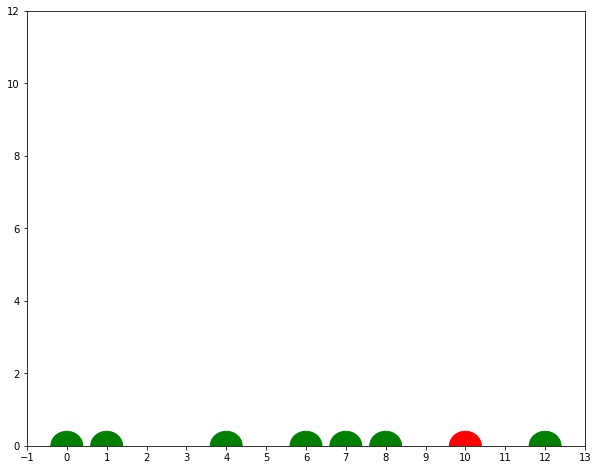

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

for l in L:
    col = 'red' if l == n else 'green'
    circ = plt.Circle((l, 0), 0.4, color=col)
    ax.add_patch(circ)
    
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_xlim(min(L)-1, max(L)+1)
ax.set_ylim(min(L), max(L))
plt.show()

Claramente, este problema no tiene solución, ya que la rana no puede librar el salto entre el lirio 1 y 4:

In [ ]:
print(rana(L, n, r))

None


Cambiando $r=3$.

In [ ]:
r = 3
rana(L, n, r)

[0, 1, 4, 7, 10]

¿Cómo probamos que este algoritmo es correcto? Para esto, necesitamos probar dos cosas:

1. Si el problema tiene solución, el algoritmo siempre encontrará una serie de saltos válida (i.e., no se atora).
2. El algoritmo encuentra una serie *óptima* de saltos (i.e., no existe un mejor camino).

---

Probamos la primera propiedad por contradicción. Sean las posiciones de los lirios $l_1 < l_2 < \cdots < l_m$. Asumimos que existe un camino de $l_1$ a $l_m$, pero que el algoritmo no pudo encontrarlo.

Llamemos $l_k$ al último lirio que alcanzó nuestro algoritmo, después del cual ya no pudo saltar a otro. En particular, esto implica que no pudo saltar al lirio $k+1$, por lo tanto:

$$ l_k + r < l_{k+1}$$

Como asumimos que existe un camino de $l_1$ a $l_m$, debe de haber algún salto en dicho camino que empieza antes de $l_{k+1}$, y que acaba en $l_{k+1}$, o algún lirio posterior. Este salto no puede hacerse desde $l_k$, así que debe de haberse hecho desde algún otro $l_s$, con $s<k$. Pero entonces tenemos:

$$ l_s + r < l_k + r < l_{k+1}$$

Es decir 

$$ l_s + r < l_{k+1}$$

Lo cual no es válido.

---

Ahora, para probar la segunda propiedad, la idea es considerar una serie de saltos óptima $J^*$ arbitraria. Si podemos probar que la serie $J$ que genera nuestro algoritmo es "tan buena" como $J^*$, habremos terminado. 

Primero que nada, es fácil notar que $|J| \geq |J^*|$, ya que cualquier solución tiene a lo mucho tantos saltos como la óptima. Nuestro objetivo es probar $|J| = |J^*|$.

Denotamos $p_J(i)$ como la posición de la rana después de dar el $i$-ésimo salto listado en la lista $J$. De esto surge el primer lema:

**Lema:** Para cada $0\leq i\leq |J^*|$, tenemos $p_J(i) \geq p_{J^*}(i)$. Es decir, si consideramos dos ranas, una que sigue la lista *greedy* $J$ y otra que sigue la óptima $J^*$, tenemos que después de $i$ saltos, la *greedy* siempre estará o en la posición de la óptima, o más adelante.

**Demostración**

* Caso base: Como $i=0$, en este caso la posición de ambas es la misma, 0.
* H.I.:  Arriba, para $0\leq i < |J^*|$
* Paso inductivo: Consideremos $i+1$. Existen dos casos posibles:
    * Caso 1: $p_J(i) \geq p_{J^*}(i+1)$. Como cada salto se mueve hacia adelante, tenemos:
    
    $$p_J(i+1) \geq p_J(i)$$
    
    Entonces: 
    
    $$p_J(i+1) \geq p_{J^*}(i+1)$$
    
    * Caso 2: $p_J(i) < p_{J^*}(i+1)$ Cada salto es de tamaño a lo mucho $r$, entonces:
    
    $$p_{J^*}(i+1) \leq p_{J^*}(i) + r$$
    
    Por nuestra H.I., sabemos que: 
    
    $$p_J(i) \geq p_{J^*}(i+1)$$
    
    Por lo que:
    
    $$ p_{J^*}(i+1) \leq p_J(i) + r$$
    
    Por lo tanto, el algoritmo *greedy* puede brincar al menos a la posición $p_{J^*}(i+1)$. Por lo tanto:
    
    $$p_J(i+1) \geq p_{J^*}(i+1)$$
    
Esto completa nuestra prueba de inducción.

---

Finalmente, podemos usar este lema para probar la segunda propiedad. Por lo mencionado anteriormente, sabemos que $|J^*| \leq |J|$. Probaremos que $|J^*| \geq |J|$.

**Demostración:** Suponemos por contradicción que $|J^*| < |J|$. Sea $k=|J^*|$. Por el lema, tenemos:

$$ n = p_{J^*}(k) \leq p_J(k)$$

Como la rana llega a la posición $n$ después de $k$ saltos de $J^*$, sabemos que:

$$ n\leq p_J(k)$$

Luego, como el algoritmo *greedy* nunca se pasa de la posición $n$, sabemos:

$$p_J(k) \leq n$$.

Por lo tanto:

$$ n = p_J(k)$$

Como asumimos que $|J^*| < |J|$, el algoritmo *greedy* debe de haber dado otro salto después de $k$, lo cual contradice el hecho de que paró después de haber llegado a la posición $n$.

Por lo tanto, nuestra suposición es falsa, y $|J^*| = |J|$, lo cual nos dice que el algoritmo *greedy* produce una solución óptima.

## Greedy stays ahead

Esta clase de pruebas se le conoce como *greedy stays ahead*. La estructura general es la siguiente:

* Encontrar una serie de medidas/costos/penalizaciones $M_1, M_2, \ldots, M_k$ que puedan aplicarse a cualquier solución.
* Mostrar que las medidas del algoritmo *greedy* son al menos tan buenas como las de cualquier solución (usualmente por inducción).
* Mostrar que como las medidas del algoritmo *greedy* son al menos tan buenas como las de cualquier solución, la solución *greedy* debe de ser óptima.

# Intervalos

Antes habíamos visto ejemplos relacionados con gráficas de intervalos, donde lo que nos importaba era considerar las intersecciones de los intervalos por parejas. Consideremos ahora el siguiente problema: dado un conjunto de intervalos $[a_1, b_1], [a_2, b_2], \dots, [a_n,b_n]$, encuentra un subconjunto de intervalos tal que cualesquiera dos no se intersecten, y que el subconjunto tenga la mayor cantidad de elementos posible.

Un posible algoritmo sería considerar ordenar los intervalos según su longitud, de menor a mayor, e ir considerando los intervalos, checando que no se vayan intersectando. ¿Es este algoritmo correcto? Consideremos el siguiente ejemplo: 

$$[0,10], [12,20], [9,14]$$ 

Siguiendo el algoritmo propuesto, se tendría que al ordenar los intervalos por longitud: 

$$[9,14], [12,20], [0,10]$$

Entonces se metería $[9,14]$ al conjunto, sin embargo ya no se podrían meter más intervalos. Notemos que este subconjunto no tiene la mayor cantidad posible, pues:

$$[12,20], [0,10]$$ tiene dos elementos que no se intersectan.

¿Qué pasa si ordenamos los intervalos según su extremo derecho? Ordenamos de menor a mayor, según el extremo derecho de los intervalos. Vamos iterando sobre la lista, y si nos encontramos con un intervalo tal que no se intersecta con los anteriores del subconjunto lo agregamos. ¿Este algoritmo funciona? Notemos que en el ejemplo previo sí obtenemos un subconjunto con la mayor cantidad de elementos posible.

In [ ]:
L = [(7, 15), (1,8), (1, 4), (5, 8), (9, 10), (3, 7), (6,8)]

L.sort(key=lambda x: x[1]) # Ordena los elementos según su segunda entrada

ans = [L[0]]
for i in range(1, len(L)):
    if(L[i][0] > ans[-1][1]): # Si el extremo izquierdo es mayor que el derecho del último
        ans.append(L[i])
print(ans)

[(1, 4), (5, 8), (9, 10)]


El probar que este algoritmo siempre produce un subconjunto válido es fácil de hacer por inducción. Nos concentramos en probar que el subconjunto producido es óptimo. Para hacerlo, usamos un argumento de *greedy stays ahead*.

Usamos la siguiente notación:

* $S$: El subconjunto de intervalos generado por nuestro algoritmo.
* $S^*$: El subconjunto de intervalos óptimo (nótese $|S|\leq |S^*|$)
* $S_i$: $i$-ésimo intervalo del conjunto $S$.
* $f(S_i)$: Extremo derecho del $i$-ésimo intervalo de $S$.

Ahora, probamos el siguiente lema:

---

**Lema:** Para cada $1\leq i\leq |S|$, tenemos $f(S_i) \leq f(S^*_i)$. Es decir, el $i$-ésimo intervalo del algoritmo siempre acaba antes que el $i$-ésimo óptimo.

**Demostración:** Probamos por inducción:

* Caso base: Inmediato, ya por definición del algoritmo el primer intervalo de $S$ siempre termina antes que cualquier otro.
* H.I.: Arriba, para $1\leq i<|S|$.
* Paso inductivo: Por H.I., tenemos que $S_i$ acaba antes que $S^*_i$. Como el intervalo $S^*_{i+1}$ necesariamente empieza después de que $S^*_i$ acaba, tenemos que también empieza después de que $S_i$ acaba. 

Por lo tanto, cuando el algoritmo *greedy* busca qué intervalo insertar en el paso $i+1$, $S^*_{i+1}$ es un posible candidato. Como en cada paso el algoritmo selecciona el intervalo que acaba antes, tenemos:

$$ f(S_{i+1}) \leq f(S^*_{i+1})\qquad \square$$

---

Con esto, probamos que el algoritmo es óptimo:

La idea es la misma que en la de la rana: sabemos $|S|\leq |S^*|$, probaremos $|S|\geq |S^*|$. Asumimos por contradicción lo contrario, i.e. $|S|<|S^*|$. Sea $k=|S|$, por el lema sabemos que:

$$f(S_k)\leq f(S^*_k)$$

Es decir, que el $k$-ésima intervalo de $S^*$ siempre acaba más tarde que el de $S$ (que coincide con ser el último de $S$). Como asumimos que $|S|<|S^*|$, $S^*$ tiene al menos un intervalo más, el cual naturalmente debe de empezar después de que acaba $S^*_k$, y por lo tanto después de que acaba $S_k$. 

Por lo tanto, después de que el algoritmo añadió el $k$-ésimo intervalo a $S$, es posible añadir todavía el intervalo $S^*_{k+1}$. Sin embargo, obtuvimos que $S_k$ era el último intervalo de $S$, lo cual es una contradicción.

Por lo tanto, nuestra suposición es falsa y $|S|\geq |S^*|$, con lo cual acabamos la prueba.

# Monedas

Consideremos monedas con valores $1, 2, 5, 10$. Dado un entero positivo $n$, ¿cómo podemos encontrar el menor número de monedas con el que podemos sumar $n$?

Un algoritmo greedy sería en cada momento, considerar el mayor valor que es menor o igual a $n$, y usar esa moneda, continuando con este proceso con el valor que resulta de restarle a $n$ el valor de la moneda usada.

Veamos una implementación de esto:

In [ ]:
coins = [1, 2, 5, 10]

def min_coins(n):
    max_idx = len(coins) - 1
    count = [0] * len(coins)
    while n > 0:
        count[max_idx] += n//coins[max_idx]
        n -= count[max_idx] * coins[max_idx]
        max_idx -= 1
    return sum(count), count

print(min_coins(100))
print(min_coins(27))
print(min_coins(75))

(10, [0, 0, 0, 10])
(4, [0, 1, 1, 2])
(8, [0, 0, 1, 7])


Parece que nuestro algoritmo es correcto, ¿cómo demostrar que en efecto lo es? Muchas veces podemos proceder por contradicción o por inducción para demostrar la correctitud de una algoritmo greedy.

Primero, probamos el siguiente lema:

---

**Lema:** Si nosotros sabemos que el algoritmo no usó ninguna moneda de $10$, entonces a lo mucho cambiamos $9$ pesos.

**Demostración:** Primero, notemos que nuestro algoritmo utiliza a lo mucho una moneda de $1$, ya que de otra manera podría haberla sustituido por una de $2$. Por el mismo argumento, no puede usar tres monedas de $2$, ya que podría haberlas cambiado por una de $5$ y una de $1$. 

Por lo tanto, la suma máxima que podemos formar es:

$$ 1 \cdot 1 + 2 \cdot 2 + 1 \cdot 5 = 10 $$

Pero si hubiésemos llegado a 10, podríamos haber cambiado las monedas por una de $10$. Por lo tanto, tenemos que detenernos en $10-1=9$. 

---

Ahora, probamos la correctitud del algoritmo por inducción. 

Como caso base consideramos todos los enteros del 1 al 10, para los cuales es fácil ver que nuestro algoritmo sí nos da el menor número de monedas posible. 

Nuestra hipótesis de inducción será que el algoritmo cumple con darnos la menor cantidad de monedas posible para todo $k \leq n$. 

Veamos que la afirmación es cierta para $n+1$. Como ya vimos que es cierto para todo entero positivo menor o igual a $10$, podemos suponer que $11 \leq n+1$. 

Por el lema, dado que $n+1>10$, sabemos que el algoritmo utiliza al menos una moneda de $10$. Usándola, tenemos ahora $n+1-10$. Esta suma es menor que $n+1$, por lo cual por H.I. sabemos que el algoritmo nos dará una solución óptima. Finalmente, si añadimos la moneda de $10$ del principio a esta solución, tendremos una solución óptima para $n+1$.

---

Con esto hemos probado que el algoritmo greedy para esta distribución de monedas nos dice el menor número de monedas posible, ¿será cierto para cualquier destribución de monedas?

Como es de esperarse, no. Hay diferentes cosas que pueden suceder para que el algoritmo no nos dé el menor número de monedas necesario.
*   Puede suceder que exista $n$ tal que no se pueda formar con las monedas disponibles. Por ejemplo, si $\{3, 7\}$ son las posibles denominaciones de las monedas, no se puede formar el número $11$.
*   También puede suceder que sí exista forma de llegar al número deseado, pero que nuestro algoritmo no nos diga correctamente el menor número de monedas necesarias, un ejemplo de esto es tener monedas con denominaciones $\{1, 4, 7, 8, 10\}$ y queremos formar el número $15$, siguiendo el algoritmo greedy se seleccionarán una moneda de $10$, otra de $4$ y otra de $1$, sin embargo, es posible usar menos monedas, seleccionando una de $8$ y otra de $7$.

¿Se puede dar un algoritmo que siempre funcione independientemente de las denominaciones de las monedas? En efecto se puede, usando programación dinámica es posible garantizar encontrar la respuesta independientemente de las denominaciones (¿cómo hacemos esto?). Esto ilustra algo que es también bastante usual: si un algoritmo greedy no funciona, se puede encontrar una forma de resolver el problema usando programación dinámica, esto no es una regla pero suele ser bastante común.


**Ejercicios.**


1.   Determina si el algoritmo descrito en el ejercicio 1 (el de las monedas) funciona si tenemos monedas con denominaciones potencias de $3$, es decir, si $\{3^n | n \in \mathbb{N}_{0}\}$ es el conjunto de denominaciones de las monedas. Desmuestra su correctitud e implementa el respectivo código en caso afirmativo o da un contraejemplo en caso negativo.
2.   Dadas dos listas con $n$ enteros cada una, $L_1, L_2$ una operación permitida es seleccionar un elemento de $L_2$ y sumarle o restarle $1$. Describe un algoritmo que permita encontrar el menor número de operaciones permitidas para que $L_1$ y $L_2$ tengan los mismos números (no necesariamente en el mismo orden), prueba su correctitud e implementa el algoritmo.



*Ejercicio 1.*

**Demostración**


 Nota: notamos que tenemos $\mathbb{N}_{0}$ ,por lo que incluye al 0 entonces $3^0=1$ y solo con esto se puede formar cualquier número positivo.


Sabemos que si nuestro algoritmo no uso ninguna moneda  $m$ con la mayor denominación entonces a lo más se intercambian $m-1$ pesos.

Ahora notamos que nuestro algoritmo utiliza  a lo más 2 monedas de uno ya que o sino se cambia por una de 3, por este mismo argumento notamos que a lo mas se utilizan 2 monedas de tres ya que o sino se cambia por una de 9.
Por lo que la suma maxima que podemos formar es de 
$$2 \cdot 1 +2 \cdot 3 +2 \cdot 9=26 $$
Notamos que aqui nos tenemos que detener ya que o sino podemos utilizar una moneda de 27.


Ahora probamos por inducción.

Para nuestro caso base utilizamos todos los enteros deo 1 al 27, ya que vimos que se cumple para este  rango.

Nuestra  hipotesis de inducción sirve para topara darnos la menor cantidad de monedas posibles $k \leq n$

Veamos que nuestra afirmació es cierta para $n+1$ como ya vimos que es cierto para todo entero  menor  o igual a 27, podemos suponer que $28 \leq n+1$.

Sabemos que si $n+1 > 27$  sabemos que el algoritmop utiliza al menos una moneda de 27.Usandola ahora tenemos $n+1-27$, la cual es menor a $n+1$ por lo cual por HI  sabemos que el algoritmo nos dara una solución óptima.Finalmente, si añadimos la moneda de 27 al principio  a esta solución , tendremos una solución óptima para $n+1$

$$\blacksquare$$

In [ ]:
coins = [1,3, 9, 27,81,243]

def min_coins(n):
    max_idx = len(coins) - 1
    count = [0] * len(coins)
    while n > 0:
        count[max_idx] += n//coins[max_idx]
        n -= count[max_idx] * coins[max_idx]
        max_idx -= 1
    return sum(count), count

print(min_coins(1))
print(min_coins(27))
print(min_coins(75))

(1, [1, 0, 0, 0, 0, 0])
(1, [0, 0, 0, 1, 0, 0])
(5, [0, 1, 2, 2, 0, 0])


*Ejercicio 2.* 

**Descripción**

Queremos un algoritmo que dadas dos listas con $n$ elementos podamos podamos hacer que estas dos listas tengan los mismos elementos, con el  menor número de operaciones posibles.

Lo que haremos será comparar el primer elemento de la primera lista con todos los elementos de la segunda, vemos si hay este mismo elemento y si no buscamos el número más cercano, a este le agregamos o restamos uno conforme con convenga.
Hacemos lo mismo con los demás elementos de la primera lista solo que ahora, si ya se uso un elemento de la lista 2 no lo podemos tocar.


**pseudocódigo**

Pedimos dos listas de números;
  comparamos el i-esimo elemento de la lista uno con el i-esimo elemento de la lista 2;

  si L1[i] == L2[i];

  regresamos l2[i];

  si L1[i] < L2[i];

  l2[i] -= l2[i];

  si L1[i] > L2[i];

  l2[i] += l2[i];


**Probar correctitud**

Para que un algoritmo sea correcto debe de cumplir lo siguiente
- Resuelve el problema computacional para el cual fue diseñado.
- Para cada entrada, produce la salida deseada.
- Termina en un tiempo de ejecución finito.

Entonces vemos que:

- El problema nos pide que hagamos que tanto l1 y l2 sean iguales restando o sumando 1 a los elementos de l2, lo cual nuestro algoritmo hace.

- Dada cuaquier entrada de listas con la misma cantidad de elementos nos regresa la segunda lista que va a tener el mismo conjunto d elemenntos que la primera

- Notamos que el algoritmo termina cuando l1[i] = l2[i] para todo elemento de las listas, por lo que en efecto termina y no es infinito.

Viendo esto notamos que nuestro algoritmo es correcto.


In [ ]:
def listas2(l1,l2):
  for i in range(len(l1)):
    if l1[i] < l2[i]:
      while l1[i] != l2[i]:
        l2[i] = l2[i] -1
    elif l1[i] > l2[i]:
        while l1[i] != l2[i]:
          l2[i] = l2[i] +1



  return  l2 
    


In [ ]:
l1=[64,3,5]
l2=[3,6,8]
listas2(l1,l2)

[64, 3, 5]